# Spam Harm Detection

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Cleaning

In [5]:
# rows and columns 
df.shape

(5572, 2)

In [6]:
# missing value in this dataset
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# duplicate values
df.duplicated().sum()

415

In [8]:
# drop the duplicate values
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5157, 2)

In [11]:
# change the target into numerical
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [13]:
df['Category']=encoder.fit_transform(df['Category'])

In [14]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA (Exploratory Data Analysis)

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.Category.value_counts()  # 0 is Harm and 1 is Spam

0    4516
1     641
Name: Category, dtype: int64

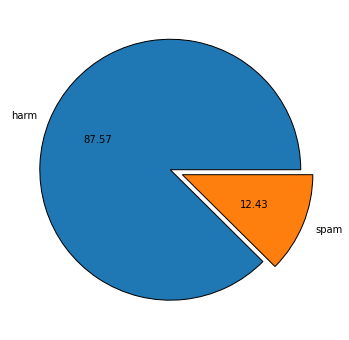

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.pie(df.Category.value_counts(),labels=['harm','spam'],autopct='%.2f',
        explode=(0,0.1),wedgeprops={'edgecolor':'k'})
plt.show()

# 3. Data Preprocessing

In [18]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# let's X and Y in our data 
x=df.iloc[:,-1].values  # input data
y=df.iloc[:,0] # output data

In [20]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [21]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

In [22]:
# handle categorical column convert into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
cv=TfidfVectorizer()

In [24]:
cv=cv.fit_transform(x).toarray() # fit_transform using traning data

In [25]:
cv

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# now split the data (training 70% and testing 30%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cv,y,test_size=0.3,random_state=10)

In [27]:
x_train.shape

(3609, 8709)

In [28]:
y_train.shape

(3609,)

In [29]:
x_test.shape

(1548, 8709)

In [30]:
y_test.shape

(1548,)

# 4. Model traning

In [34]:
# Apply algo naive_bayes
from sklearn.naive_bayes import MultinomialNB

In [35]:
nb=MultinomialNB()

In [36]:
# traning the data
nb.fit(x_train,y_train)

MultinomialNB()

# 5. Predict the model

In [37]:
y_pred=nb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# wrong prediction 
print('wrong Prediction out of total:')
print((y_test!=y_pred).sum(),'/',(y_test==y_pred).sum()+(y_test!=y_pred).sum())

wrong Prediction out of total:
63 / 1548


In [39]:
# find out the missclassified
import numpy as np
np.where(y_pred!=y_test)

(array([   2,   86,  135,  138,  160,  281,  282,  291,  318,  319,  337,
         392,  396,  408,  459,  463,  496,  504,  514,  569,  583,  586,
         598,  613,  658,  702,  749,  777,  782,  804,  805,  806,  807,
         843,  881,  918,  920,  975,  985,  992, 1009, 1028, 1031, 1056,
        1093, 1097, 1148, 1190, 1200, 1202, 1215, 1251, 1271, 1278, 1288,
        1292, 1308, 1337, 1420, 1428, 1498, 1499, 1530], dtype=int64),)

# 6. Model Evaluation

In [40]:
# accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [41]:
print("Accuracy:",100*accuracy_score(y_test,y_pred))

Accuracy: 95.93023255813954


In [42]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1377,    0],
       [  63,  108]], dtype=int64)

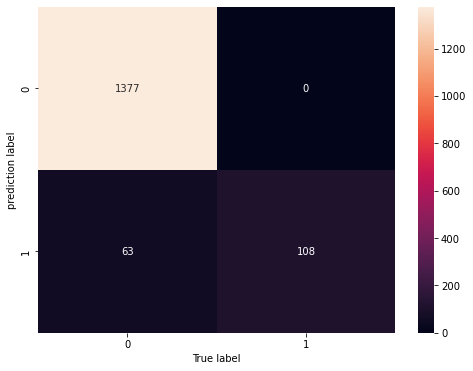

In [43]:
# plotting confusion matrix in heatmap
import seaborn as sb
plt.figure(figsize=(8,6))
sb.heatmap(cm,annot=True,cbar=True,fmt='d')
plt.xlabel('True label')
plt.ylabel('prediction label')
plt.show()

In [44]:
# precision score
precision_score(y_test,y_pred)

1.0

In [45]:
# recall score
recall_score(y_test,y_pred)

0.631578947368421

In [46]:
# F1 score
f1_score(y_test,y_pred)

0.7741935483870968

# Now sum different algorithum apply to check best accuary or not

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [49]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
                        return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.976172,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.956219,{'n_estimators': 10}
2,logistic_regression,0.969521,{'C': 10}
3,naive_bayes_gaussian,0.903297,{}
4,naive_bayes_multinomial,0.936272,{}
5,decision_tree,0.960654,{'criterion': 'gini'}
